# Visualization of the Crossover Strategy 4 Years Period 

- Having conducted the backtesting analysis in the matetrader 4, we have seems the ultima condition found in the dissertation was reliable. However within the 4 years analysis conducted the year 2018 to 2019 had a more than 50% loss in capital. Therefore, this visualization project wants to determine what kind of the market fluctuation causes significant changes, comparing the year 2018-2019 to other time frames

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Functions For the Crossover Strategy and Visualization

In [23]:
def is_trade(row):
    if row.DIFF >= 0 and row.DIFF_PREV < 0:
        return 1
    if row.DIFF <= 0 and row.DIFF_PREV > 0:
        return -1
    return 0 

In [10]:
def selectdate (start_date, end_date):
    df = (data['TIME'] > start_date) & (data['TIME'] <= end_date)
    df1 = data.loc[df]
    df1 = df1.set_index('TIME')
    return df1

In [3]:
def vis_sing (x):
    fig, ax = plt.subplots()
    ax.plot(x.index, x['CUM_GAIN'])
    ax.set_xlabel('Time')
    ax.set_ylabel('Close Price')
    fig.set_size_inches(18.5, 10.5)
    plt.show()

In [4]:
def vis_double(x, y):
    fig, ax = plt.subplots()
    ax.plot(x.index , x['CLOSE'], color='blue')
    ax.set_xlabel('Time')
    ax.set_ylabel('Close Price')
    ax.tick_params('y', colors='blue')

    ax2 = ax.twinx()
    ax2.plot(y.index , y['CUM_GAIN'], color='red')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Close Price')
    ax2.tick_params('y', colors='red')
    fig.set_size_inches(18.5, 12.5)

    return plt.show()

In [26]:
def crossover(x):
    df = x
    df['MA_16'] = df.CLOSE.rolling(window=16).mean()
    df['MA_64'] = df.CLOSE.rolling(window=64).mean()
    df['DIFF'] = df.MA_16 - df.MA_64
    df['DIFF_PREV'] = df.DIFF.shift(1)
    df['IS_TRADE'] = df.apply(is_trade, axis = 1)
    
    df_trades = df[df.IS_TRADE !=0].copy()
    df_trades['DELTA'] = df_trades.CLOSE.diff().shift(-1)
    df_trades['GAIN'] = df_trades['DELTA'] * df_trades['IS_TRADE'] * 100
    df_trades['CUM_GAIN'] = df_trades['GAIN'].cumsum(axis=0)
    df_trades['IN_USD'] = df_trades.CUM_GAIN * 9.4
    
    return df_trades

In [13]:
def vis_analysis ():
    start_date = input('start_date: ')
    end_date = input('end_date: ')
    df = selectdate(start_date, end_date)
    cross = crossover(df)
    vi = vis_double(df, cross)
    
    return vi

In [7]:
def clean_data (x):
    data = pd.read_csv(x , sep='\t')
    data.columns = ['TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
    data['TIME'] = pd.to_datetime(data['TIME'], dayfirst = True)
    
    return data

# Crossover Strategy GBPJPY Backtesting Visualization 

In [8]:
data = clean_data('GBPJPY60.csv')

start_date: 28-12-2017
end_date: 01-01-2019


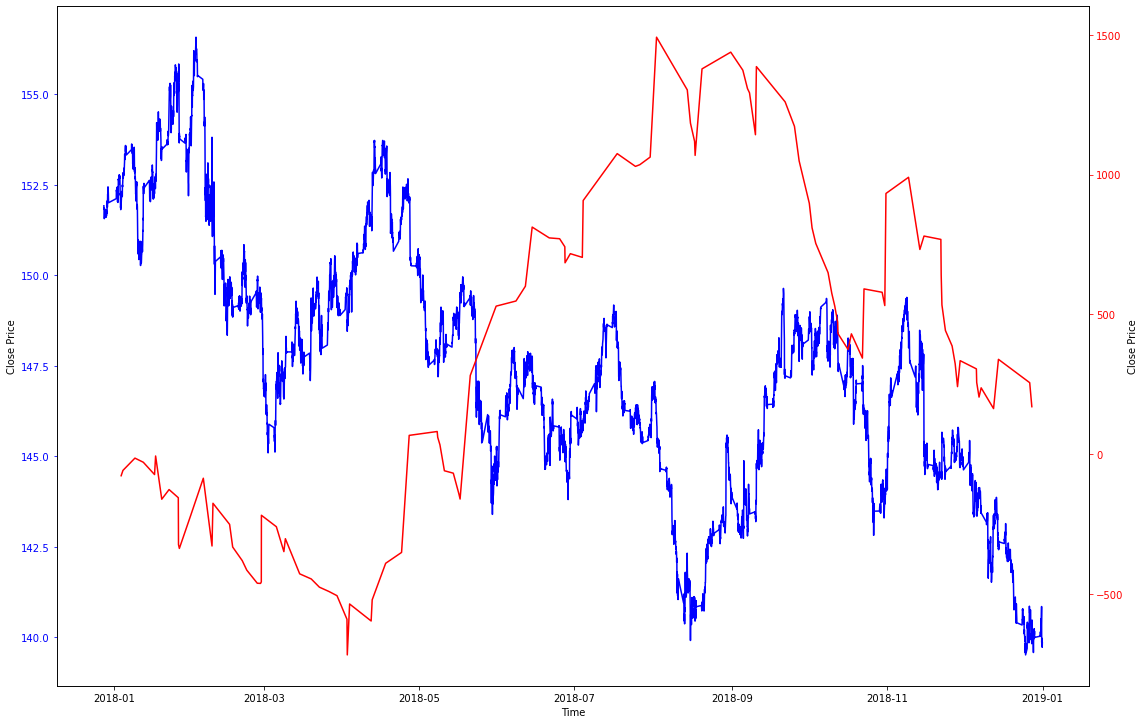

In [27]:
vis_analysis()

start_date: 28-12-2018
end_date: 01-01-2021


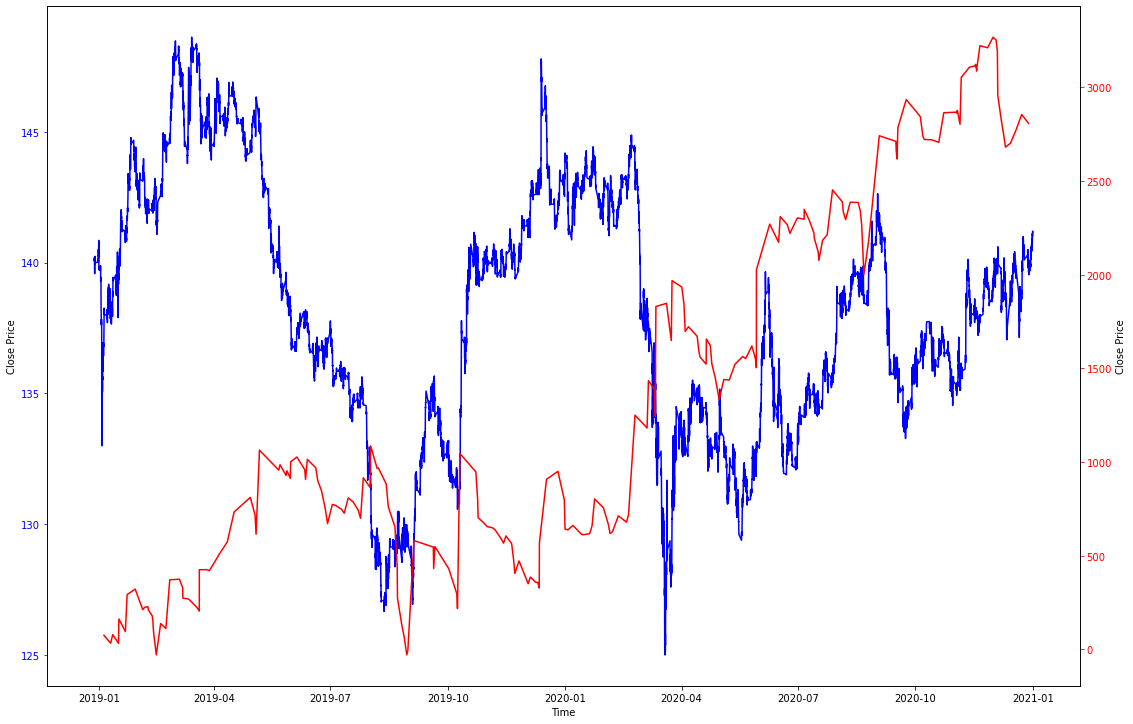

In [28]:
vis_analysis()

start_date: 28-12-2019
end_date: 01-01-2021


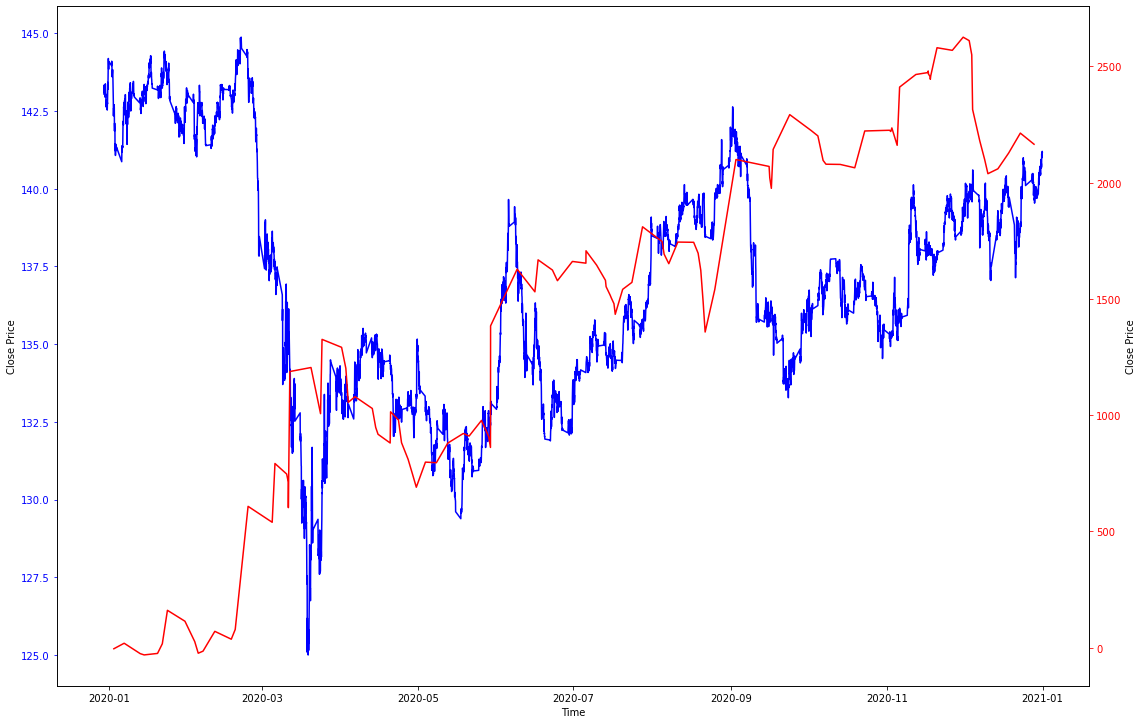

In [30]:
vis_analysis()

start_date: 28-12-2020
end_date: 01-01-2022


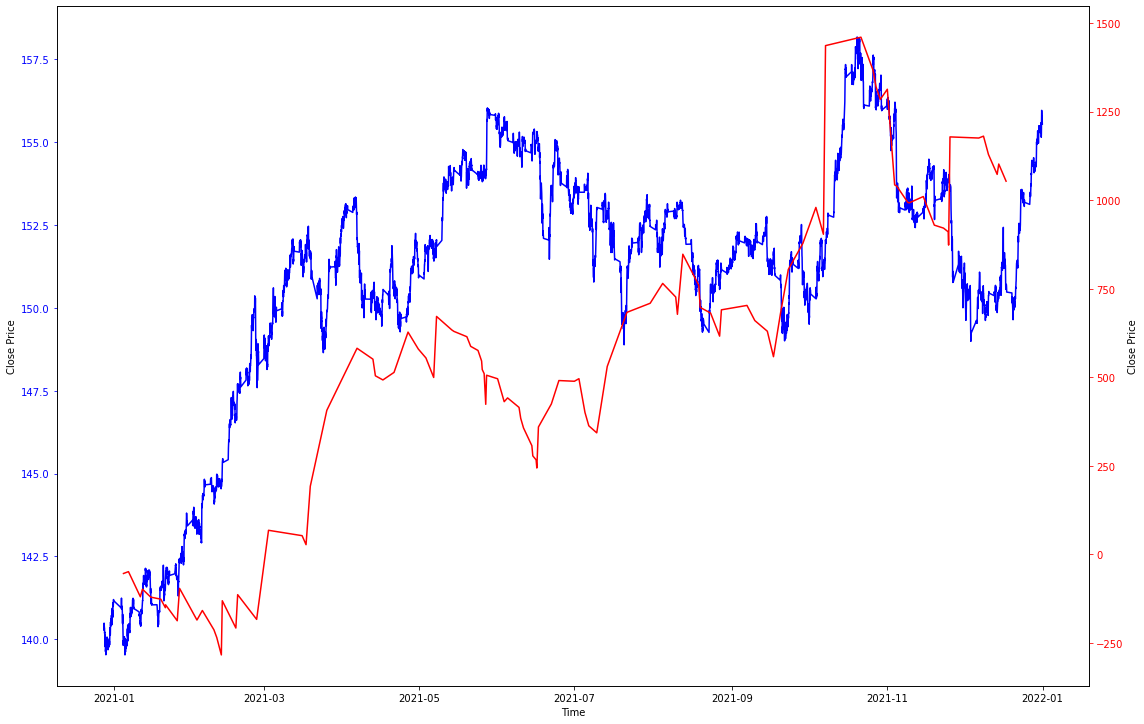

In [31]:
vis_analysis()

start_date: 01-05-2021
end_date: 28-06-2021


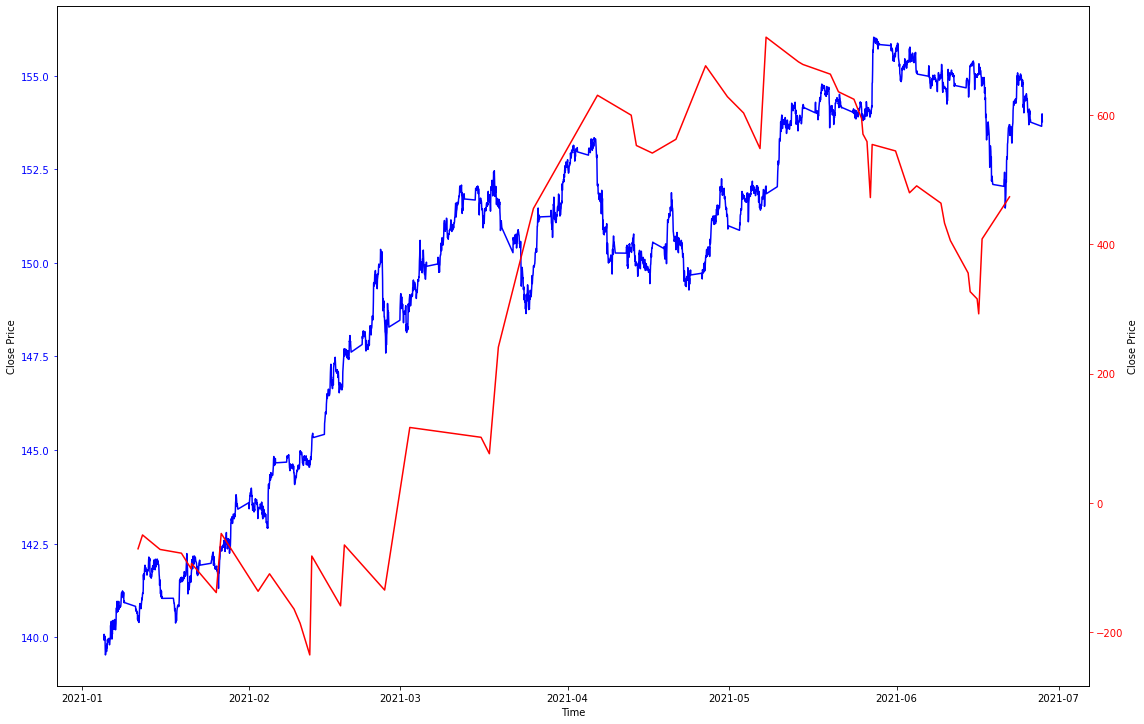

In [32]:
vis_analysis()